In [1]:
import anndata
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from ALLCools.plot import *
from wmb import brain, cemba, cemba_atac

In [2]:
mc_annot = cemba.get_mc_annot()
atac_annot = cemba_atac.get_atac_annot()

L4_annot does not exist in data_vars or coords, palette not added.


In [3]:
major_region = "Isocortex"

In [4]:
adata = anndata.read_h5ad(f"./final_with_coords.h5ad")
adata.obs["labels"] = pd.concat(
    [atac_annot["L3_annot"].to_pandas(), mc_annot["CellType"].to_pandas()]
)
adata.obs["regions"] = pd.concat(
    [
        atac_annot["DissectionRegion"].to_pandas(),
        mc_annot["DissectionRegion"].to_pandas(),
    ]
)

In [5]:
mc_adata = adata[adata.obs["Modality"] == "mC"]
atac_adata = adata[adata.obs["Modality"] == "ATAC"]

In [6]:
def plot(mc_adata, atac_adata, region=None):
    fig, axes = plt.subplots(figsize=(15, 10), nrows=2, ncols=3, dpi=300)

    for row, (fore, back), name in zip(
        [0, 1], [(mc_adata, atac_adata), (atac_adata, mc_adata)], ['mC', 'ATAC']
    ):
        ax = axes[row, 0]
        categorical_scatter(
            ax=ax, data=back, coord_base="tsne", color="lightgrey", max_points=None
        )
        categorical_scatter(
            ax=ax,
            data=fore if region is None else fore[fore.obs["regions"] == region],
            coord_base="tsne",
            hue="leiden",
            text_anno="leiden",
            palette="hls",
            max_points=None,
        )
        ax.set_title(f'{name} Co-cluster')
        ax = axes[row, 1]
        categorical_scatter(
            ax=ax, data=back, coord_base="tsne", color="lightgrey", max_points=None
        )
        categorical_scatter(
            ax=ax,
            data=fore if region is None else fore[fore.obs["regions"] == region],
            coord_base="tsne",
            hue="labels",
            # text_anno="labels",
            palette="hls" if row == 1 else cemba.get_cell_type_palette(),
            max_points=None,
        )
        ax.set_title(f'{name}-only clusters')
        ax = axes[row, 2]
        categorical_scatter(
            ax=ax, data=back, coord_base="tsne", color="lightgrey", max_points=None
        )
        categorical_scatter(
            ax=ax,
            data=fore if region is None else fore[fore.obs["regions"] == region],
            coord_base="tsne",
            hue="regions",
            # text_anno="labels",
            palette=brain.get_dissection_region_palette("CEMBA"),
            max_points=None,
        )
        ax.set_title(f'{name} Dissection Region')
    return fig, axes

In [7]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(f"{major_region}.integration_embeddings.pdf")

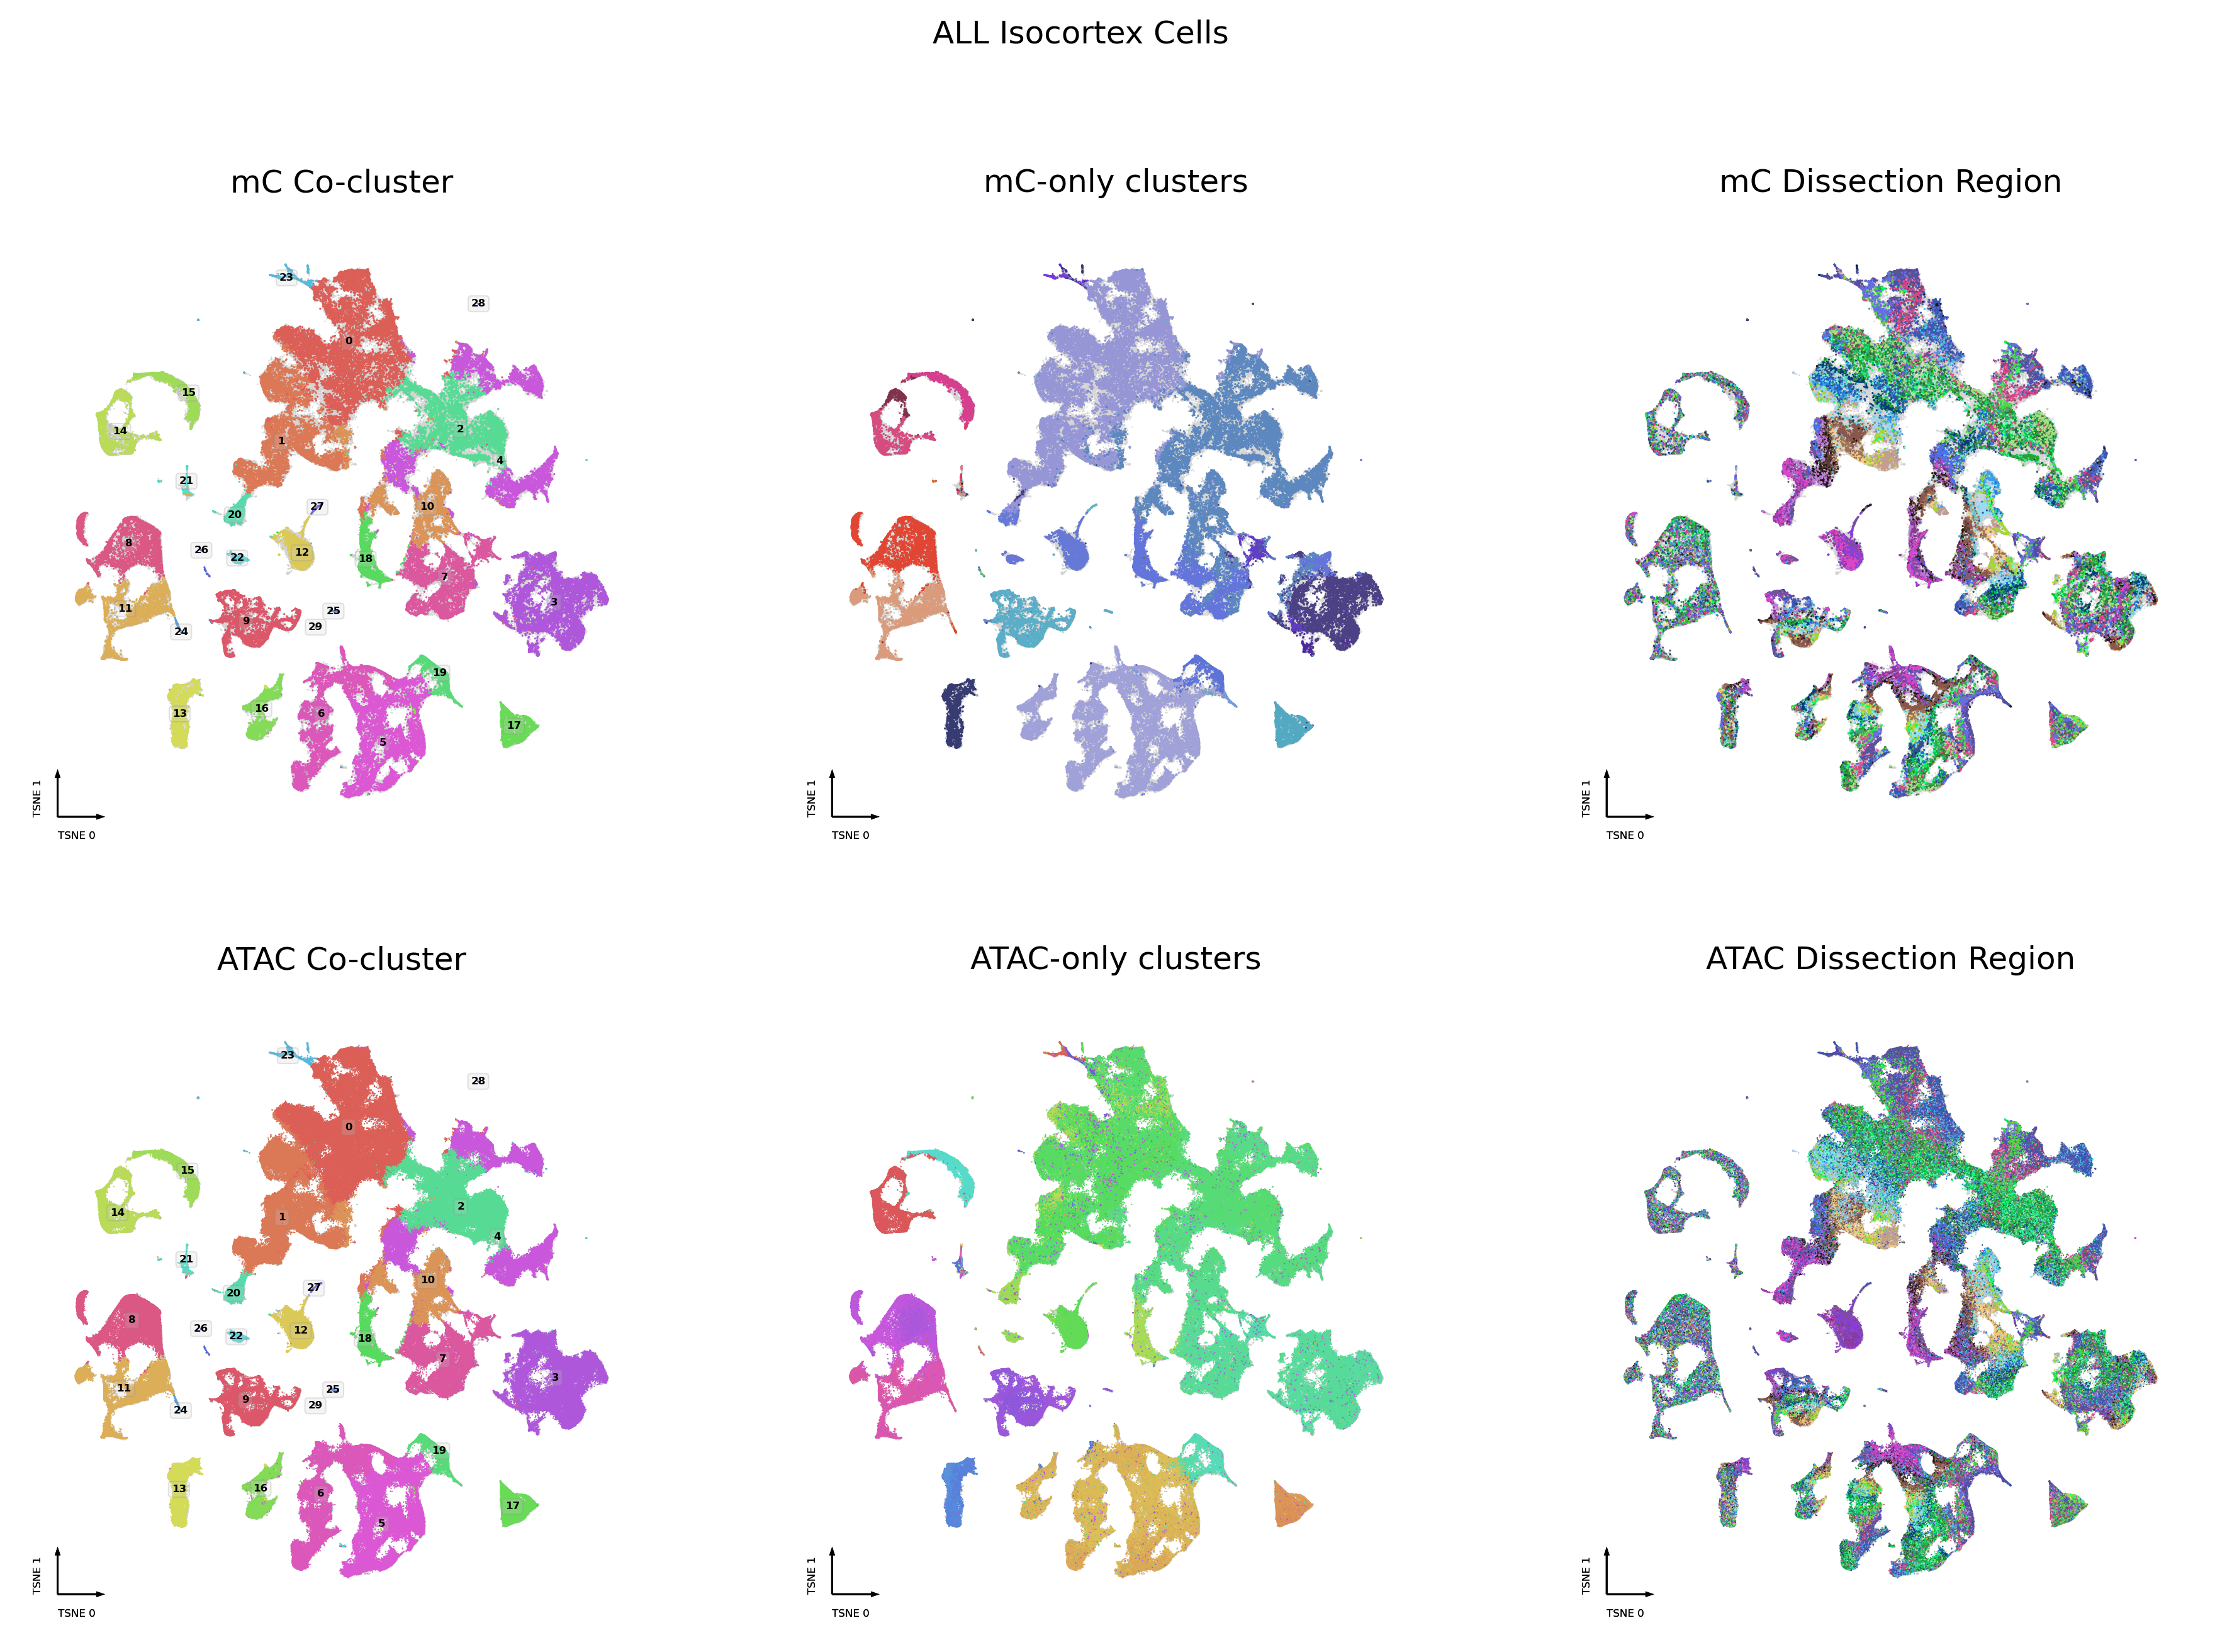

In [8]:
fig, axes = plot(mc_adata, atac_adata)
fig.suptitle(f'ALL {major_region} Cells')
pdf.savefig(fig)

In [ ]:
brain_meta = brain.get_brain_metadata("CEMBA")
regions = sorted(
    brain_meta.loc[brain_meta["MajorRegion"] == major_region, "Acronym"].unique()
)
for region in regions:
    fig, axes = plot(mc_adata, atac_adata, region=region)
    fig.suptitle(f'{region} Cells')
    pdf.savefig(fig)

In [10]:
mc_counts = mc_adata.obs.groupby("leiden")["regions"].value_counts().unstack().fillna(0)
mc_ratio = mc_counts / mc_counts.sum(axis=1).values[:, None]
atac_counts = (
    atac_adata.obs.groupby("leiden")["regions"].value_counts().unstack().fillna(0)
)
atac_ratio = atac_counts / atac_counts.sum(axis=1).values[:, None]

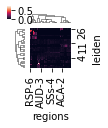

In [11]:
g = sns.clustermap(mc_ratio, metric="correlation", figsize=(1,1))

In [12]:
atac_ratio.reindex(mc_ratio.columns,axis=1).fillna(0)

regions,ACA-1,ACA-2,ACA-3,AI,AUD-1,AUD-2,AUD-3,MOp-1,MOp-2,MOp-3,...,SSs-3,SSs-4,"TEa,ECT,PERI-1","TEa,ECT,PERI-2","TEa,ECT,PERI-3",VIS-1,VIS-2,VIS-3,VIS-4,VISC
leiden,,,,,,,,,,,,,,,,,,,,,
0,0.000270,0.000497,0.000568,0.006152,0.044102,0.038078,0.040536,0.024694,0.020900,0.018883,...,0.041175,0.043861,0.026399,0.029368,0.045722,0.040621,0.040124,0.046802,0.049785,0.029724
1,0.044981,0.038134,0.082110,0.054468,0.001098,0.000935,0.000724,0.065473,0.021941,0.019067,...,0.000701,0.000537,0.000304,0.000117,0.000140,0.016076,0.010982,0.005328,0.007197,0.000981
2,0.000207,0.000138,0.000184,0.004116,0.038883,0.034285,0.022557,0.013820,0.029410,0.022075,...,0.080342,0.071926,0.001541,0.002001,0.001702,0.012463,0.007105,0.005519,0.003380,0.018212
3,0.029020,0.018545,0.028695,0.026890,0.027416,0.025612,0.028945,0.006240,0.027442,0.022129,...,0.030499,0.029973,0.018520,0.014209,0.013007,0.027341,0.024935,0.030599,0.018470,0.022880
4,0.001226,0.007121,0.014711,0.002139,0.033465,0.041237,0.055948,0.004956,0.010146,0.012546,...,0.015754,0.017867,0.033282,0.030439,0.044315,0.066955,0.072042,0.083935,0.079866,0.043794
5,0.026699,0.014321,0.012987,0.021481,0.035888,0.034323,0.034990,0.001855,0.024583,0.026583,...,0.038497,0.037367,0.030119,0.034323,0.027308,0.028554,0.027568,0.035830,0.014118,0.034004
6,0.014451,0.016210,0.044387,0.027970,0.023901,0.019107,0.022763,0.001276,0.015175,0.017210,...,0.023625,0.023970,0.013175,0.010209,0.011657,0.033420,0.030764,0.037662,0.018520,0.021555
7,0.024867,0.019137,0.023196,0.040662,0.013726,0.016432,0.018819,0.027652,0.032784,0.026816,...,0.016074,0.016273,0.039827,0.031869,0.021684,0.028050,0.024787,0.026021,0.022917,0.022798
8,0.019771,0.012373,0.025456,0.028716,0.028173,0.027546,0.027211,0.024202,0.023867,0.021276,...,0.026960,0.023366,0.025748,0.029427,0.026208,0.026166,0.023324,0.027587,0.022613,0.025497


In [13]:
atac_annot

<xarray.CEMBAATACCellAnnotation>
Dimensions:             (cell: 2312406, L1_cat: 11, L2_cat: 88, L3_cat: 602, L4Region_cat: 76588, L4_cat: 13456, l1_umap: 2, l2_umap: 2, l3_umap: 2)
Coordinates:
  * cell                (cell) object 'CEMBA171206_3C_AGCGATAGACTCGCTATTATGCG...
  * L1_cat              (L1_cat) int64 0 1 2 3 4 5 6 7 8 9 10
  * L2_cat              (L2_cat) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87
  * L3_cat              (L3_cat) int64 0 1 2 3 4 5 6 ... 596 597 598 599 600 601
  * L4Region_cat        (L4Region_cat) int64 0 1 2 3 ... 76584 76585 76586 76587
  * L4_cat              (L4_cat) int64 0 1 2 3 4 ... 13452 13453 13454 13455
  * l1_umap             (l1_umap) object 'l1_umap_0' 'l1_umap_1'
  * l2_umap             (l2_umap) object 'l2_umap_0' 'l2_umap_1'
  * l3_umap             (l3_umap) object 'l3_umap_0' 'l3_umap_1'
Data variables: (12/21)
    L1                  (cell) int8 dask.array<chunksize=(2312406,), meta=np.ndarray>
    L1_cat_annot        (L1_cat) object dask.array<chunksize=(11,), meta=np.ndarray>
    L2                  (cell) int8 dask.array<chunksize=(2312406,), meta=np.ndarray>
    L2_cat_annot        (L2_cat) object dask.array<chunksize=(88,), meta=np.ndarray>
    L3                  (cell) int16 dask.array<chunksize=(2312406,), meta=np.ndarray>
    L3_cat_annot        (L3_cat) object dask.array<chunksize=(602,), meta=np.ndarray>
    ...                  ...
    L3_annot            (cell) object 'PVGA9' 'SSTGA1' ... 'BERG1' 'MOL9'
    L4Region_annot      (cell) object 'PVGA9_new_cells' ... 'MOL9_1_1_1_1_r8'
    L4_annot            (cell) object 'PVGA9_new_cells' ... 'MOL9_1_1_1'
    DissectionRegion    (cell) object 'MOp-2' 'MOp-2' 'MOp-2' ... 'CB-4' 'CB-4'
    MajorRegion         (cell) object 'Isocortex' 'Isocortex' ... 'CB' 'CB'
    SubRegion           (cell) object 'MOp' 'MOp' 'MOp' ... 'CBX' 'CBX' 'CBX'
Attributes:
    L1_coord:           ['l1_tsne', 'l1_umap']
    L2_coord:           ['l2_tsne', 'l2_umap']
    L3_coord:           ['l3_tsne', 'l3_umap']
    cluster_data_var:   ['L1', 'L2', 'L3', 'L4', 'L4Region']
    cluster_hierarchy:  [['L1'], ['L2'], ['L3'], ['L4'], ['L4Region']]
    annot_path:         /cemba/wmb/cemba_atac/CEMBA.snATAC.Annotations.v2.zarr
    __cache__:          {}

In [14]:
brain_meta[brain_meta['Acronym'].isin(['TEa,ECT,PERI-2', 'TEa,ECT,PERI-3'])]

,Acronym,RegionType,MajorRegionColor,SubRegionColor,DissectionRegionColor,MajorRegion,SubRegion,OverlapStructures,OverlapRatio,Slice,SliceWidth,CCFSliceStart,CEMBA3CID,CEMBAID,CEMBAv1,AIBSRegionName,AIBSSMARTStructure,Note
NumericValue,,,,,,,,,,,,,,,,,,
89,"TEa,ECT,PERI-2",CEMBA,#176CDB,#666de1,#5b41a6,Isocortex,"TEa,ECT,PERI","TEa,ECT,AUDv,PERI","TEa:42,ECT:34,AUDv:18,PERI:7",11.0,600.0,NaN,12A3C,11K,False,NaN,NaN,NaN
92,"TEa,ECT,PERI-3",CEMBA,#176CDB,#666de1,#57549c,Isocortex,"TEa,ECT,PERI","TEa,ECT,PERI,AUDv,AUDpo,VISpor","TEa:55,ECT:19,PERI:12,AUDv:7,AUDpo:5,VISpor:1",12.0,600.0,NaN,12A3C,12C,False,NaN,NaN,NaN


In [ ]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=3, constrained_layout=True, sharey=True)
ax = axes[0]
sns.heatmap(
    ax=ax,
    data=mc_ratio.iloc[
        g.dendrogram_row.dendrogram["leaves"], g.dendrogram_col.dendrogram["leaves"]
    ],
    cbar=None,
)
ax = axes[1]
sns.heatmap(
    ax=ax,
    data=atac_ratio.iloc[
        g.dendrogram_row.dendrogram["leaves"], g.dendrogram_col.dendrogram["leaves"]
    ],
    # cbar=None,
)
ax = axes[2]
sns.heatmap(
    ax=ax,
    data=(mc_ratio - atac_ratio).iloc[
        g.dendrogram_row.dendrogram["leaves"], g.dendrogram_col.dendrogram["leaves"]
    ],
    # cbar=None,
    cmap="coolwarm",
    vmin=-0.5,
    vmax=0.5,
)
pdf.savefig(fig)

In [ ]:
pdf.close()

In [ ]:
full_names = pd.read_csv(
    cemba_atac.CEMBA_ATAC_CLUSTER_FULL_NAME_PATH, sep="\t", index_col=0
).squeeze()

In [ ]:
for k, v in full_names.items():
    print(k, v)